# Machine Learning - Assignment 4

We continue Andrew Ng's course with Neural Networks Learning

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.optimize as op
from scipy.io import loadmat

## Problem 1: Neural Networks

### Problem 1.1: Visualizing the Data

First, we load the data and look at the shapes and count values. Small exploratory data analysis.

In [2]:
data = loadmat('./data/ex4data1.mat')
X, y = data["X"], data["y"].ravel()

In [16]:
print(X.shape)

(5000, 400)


In [4]:
print(np.unique(y))
print(np.bincount(y)[1:])

[ 1  2  3  4  5  6  7  8  9 10]
[500 500 500 500 500 500 500 500 500 500]


We can see the data is pretty much the same (in format) as the data from excercise 3 (last post). So we know we can use the same code to plot the randomn 100 numbers below.

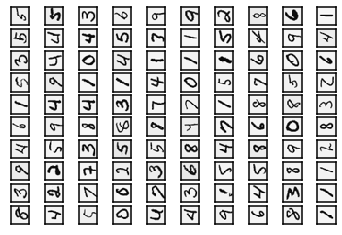

In [18]:
plt.figure()
rng = np.random.RandomState(0)
for i in range(100):
    plt.subplot(10, 10, i + 1)
    plt.imshow(X[rng.randint(X.shape[0])].reshape((20, 20)),
               cmap=plt.cm.binary, interpolation='nearest')
    plt.xticks([])
    plt.yticks([])
plt.show()

### Problem 1.2: Model Representation

Load weight data 

In [19]:
w = loadmat('./data/ex4weights.mat')
theta1, theta2 = w["Theta1"], w["Theta2"]

In [20]:
print(theta1.shape)
print (theta2.shape)

(25, 401)
(10, 26)


We can see it is a simple 1 hidden layer neural network model. 

### Problem 1.3: Feedforwarding and cost function

Now we will implement the cost function and gradient for the neural network. $$J(\theta) = \frac{1}{m} \sum_{i=1}^m{\sum_{k=1}^K{
    [-y^{(i)}_k \log{((h_{\theta}}(x^{(i)}))_k) -
    (1 - y^{(i)}_k) \log{(1 - (h_{\theta}}(x^{(i)}))_k)]}} +
    \frac{\lambda}{2m}[\sum_{j=1}^{25}{\sum_{k=1}^{400}{(\theta_{j,k}^{(1)})^2}} +
    \sum_{j=1}^{10}{\sum_{k=1}^{25}{(\theta_{j,k}^{(2)})^2}}]$$

In [ ]:
def nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lam):
    Theta1 = nn_params[:hidden_layer_size * (input_layer_size + 1)]
    Theta1 = Theta1.reshape((hidden_layer_size, input_layer_size + 1))
    Theta2 = nn_params[hidden_layer_size * (input_layer_size + 1):]
    Theta2 = Theta2.reshape((num_labels, hidden_layer_size + 1))
    
    
    returns J, grad

In [52]:
input_layer_size  = X.shape[1] #400
hidden_layer_size = theta1.shape[0] #25
num_labels = len(np.unique(y)) #10
nn_params = np.hstack((theta1.ravel(), theta2.ravel()))

In [53]:
Theta1 = nn_params[:hidden_layer_size * (input_layer_size + 1)]
Theta1 = Theta1.reshape((hidden_layer_size, input_layer_size + 1))

In [54]:
Theta1.shape

(25, 401)

In [58]:
Theta2 = nn_params[hidden_layer_size * (input_layer_size + 1):]
Theta2 = Theta2.reshape((num_labels, hidden_layer_size + 1))
Theta2.shape

(10, 26)